<a href="https://colab.research.google.com/github/GawainGan/Causal-Inference/blob/main/Causal%20Inference%20and%20Discovery%20in%20Python/LassoCV%E8%A7%A3%E9%87%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best alpha: 0.3553


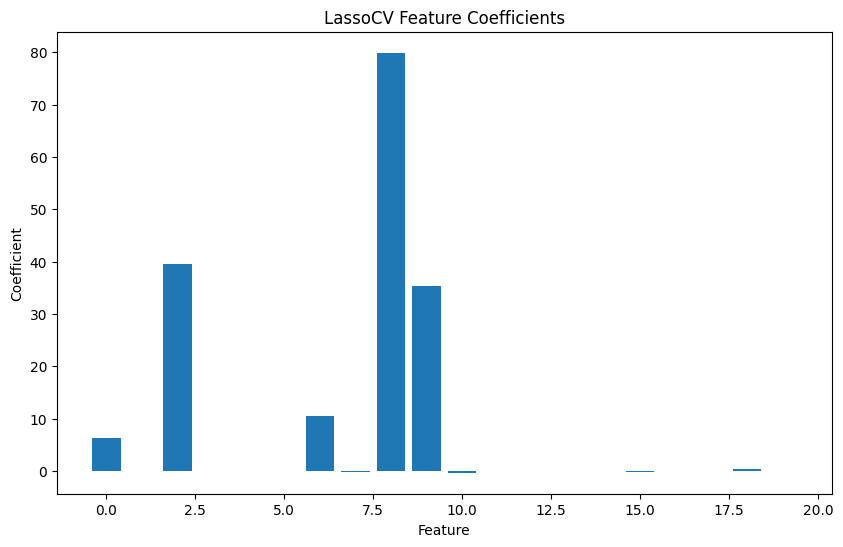

Number of non-zero coefficients: 10


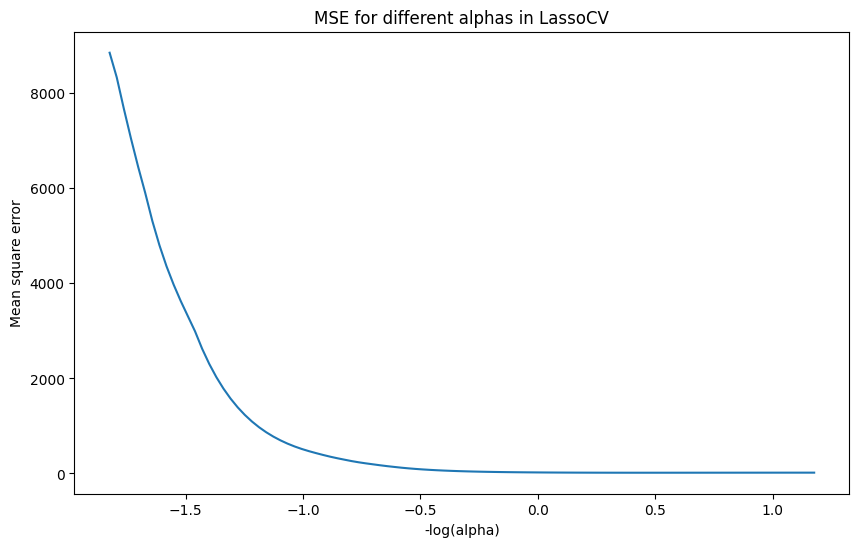

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

# 生成模拟数据
n_samples, n_features = 100, 20
# 生成模拟数据：20 个特征，但只有 5 个是真正有信息量的。
X, y, true_coef = make_regression(n_samples=n_samples, n_features=n_features,
                                  n_informative=5, noise=4, coef=True, random_state=42)

# 创建和拟合 LassoCV 模型
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X, y)

# 打印最佳 alpha 值
print(f"Best alpha: {lasso_cv.alpha_:.4f}")

# 可视化特征系数
plt.figure(figsize=(10, 6))
plt.bar(range(n_features), lasso_cv.coef_)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('LassoCV Feature Coefficients')
plt.show()

# 打印非零系数的数量
print(f"Number of non-zero coefficients: {np.sum(lasso_cv.coef_ != 0)}")

# 可视化不同 alpha 值的 MSE
m_log_alphas = -np.log10(lasso_cv.alphas_)
plt.figure(figsize=(10, 6))
plt.plot(m_log_alphas, lasso_cv.mse_path_.mean(axis=-1))
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('MSE for different alphas in LassoCV')
plt.show()

LassoCV（Lasso with Cross-Validation）是一种线性回归方法，它结合了 Lasso 回归和交叉验证。

**特点：**
- 执行特征选择
- 有助于防止过拟合
- 处理高维数据（特征数量大于样本数量的情况）

**作用：**
- 自动选择最优的正则化参数 (alpha)
- 进行特征选择
- 产生稀疏模型（部分系数为零）

**生成的结果**
- 特征系数图：显示了每个特征的系数大小。你会发现大多数特征的系数为零或接近零，只有少数几个特征有显著的非零系数。这正是 Lasso 进行特征选择的结果。

- MSE vs. alpha 图：显示了不同 alpha 值下的均方误差。这个图帮助我们理解 LassoCV 如何选择最佳的 alpha 值。最佳的 alpha 通常对应 MSE 最小的点。

**LassoCV 在因果推断中的作用：**
- 特征选择：在高维数据中，LassoCV 可以帮助识别最相关的特征，简化模型并提高解释性。
- 防止过拟合：通过正则化和交叉验证，LassoCV 可以产生更稳健的估计，减少过拟合的风险。
- 处理多重共线性：在存在高度相关特征的情况下，Lasso 倾向于选择其中一个特征，这有助于处理多重共线性问题。
- 提供稀疏解：在因果推断中，稀疏解可以帮助我们更容易地解释和理解因果关系。

**在因果推断的模型拟合：**
```
# Get estimate (DML) - Double Machine Learning (适合高维数据)
            # 利用DML方法的优势来估计因果效应。
            # 通过使用强大的非线性模型(GradientBoostingRegressor)来捕捉复杂关系。
            # 使用LassoCV进行最终估计,以处理可能的高维问题并提供一定的可解释性。
            estimate_dml = model.estimate_effect(
                identified_estimand=estimand,
                method_name='backdoor.econml.dml.DML',
                method_params={
                    'init_params': {
                        'model_y': GradientBoostingRegressor(),
                        'model_t': GradientBoostingRegressor(),
                        'model_final': LassoCV(fit_intercept=False), # = False 意味着模型不会拟合截距，这在某些情况下可以提高因果效应估计的准确性
                    },
                    'fit_params': {}}
            )   

```

通过使用 LassoCV，我们可以在 Double Machine Learning 的最后阶段得到一个更加稳健和可解释的因果效应估计。它既考虑了数据的复杂性（通过前面的 GradientBoostingRegressor），又提供了一个相对简单和可解释的最终模型

